# Show the spatial distribution of missing values in the data

In [1]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## load the data

In [2]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections'].tolist()
original_shape = data.shape

### Compute the histogram of the missing rate at different voxels

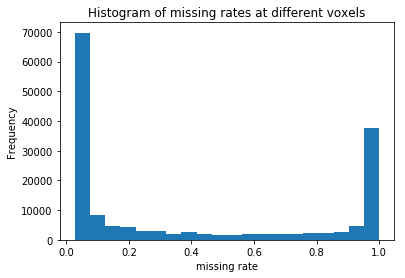

In [3]:
plt.hist(np.mean(data < 0, axis=0).flatten(), bins=20)
plt.title("Histogram of missing rates at different voxels")
plt.xlabel("missing rate")
plt.ylabel("Frequency")
plt.show()

- Observation: In general, the missing rate is quite high.

### Compute the missing rate along each axes

In [4]:
#preprocess find the high missing rate region
all_missed = (np.mean(data < 0, axis=0) >= .95)
selected = np.logical_not(all_missed)[np.newaxis, :, :, :]

In [5]:
print("The missing rate after ignoring the high missing rate region is {}".format(np.mean((data < 0) * selected) / np.mean(selected)))

The missing rate after ignoring the high missing rate region is 0.21973993260352617


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


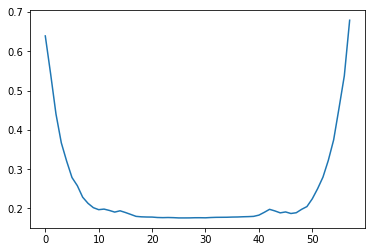

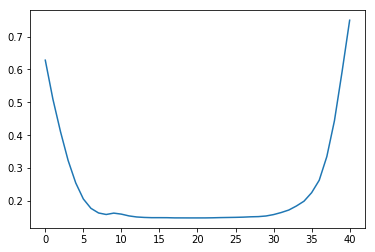

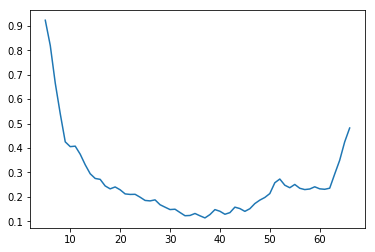

In [6]:
missing_rate_along_z = np.mean((data < 0) * selected, axis=(0,1,2))  / np.mean(selected, axis=(0,1,2))
missing_rate_along_y = np.mean((data < 0) * selected, axis=(0,1,3))  / np.mean(selected, axis=(0,1,3))
missing_rate_along_x = np.mean((data < 0) * selected, axis=(0,2,3))  / np.mean(selected, axis=(0,2,3))
plt.figure()
plt.plot(range(len(missing_rate_along_z)), missing_rate_along_z)
plt.figure()
plt.plot(range(len(missing_rate_along_y)), missing_rate_along_y)
plt.figure()
plt.plot(range(len(missing_rate_along_x)), missing_rate_along_x)

- Observation: the missing rate is high at the boundaries.

### Compute the missing rate for each 2d plane

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


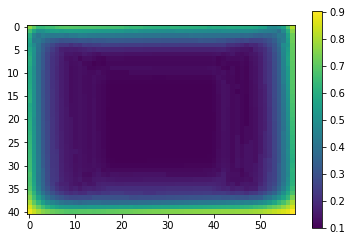

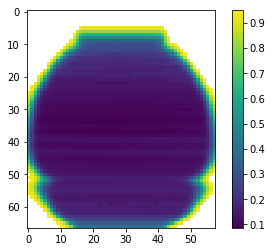

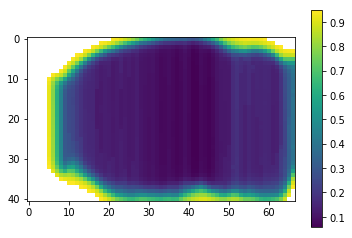

In [7]:
missing_rate_along_yz = np.mean((data < 0) * selected, axis=(0,1))  / np.mean(selected, axis=(0,1))
missing_rate_along_xz = np.mean((data < 0) * selected, axis=(0,2))  / np.mean(selected, axis=(0,2))
missing_rate_along_xy = np.mean((data < 0) * selected, axis=(0,3))  / np.mean(selected, axis=(0,3))
plt.figure()
plt.imshow(missing_rate_along_yz)
plt.colorbar()
plt.figure()
plt.imshow(missing_rate_along_xz)
plt.colorbar()
plt.figure()
plt.imshow(missing_rate_along_xy.T)
plt.colorbar()
plt.show()

- Observation: The missing rate is high at the boundary.

In [8]:
#preprocess find the genes that has values at [10,20,5]
gene_index = []
for i in range(4345):
    if data[i, 10, 20, 5] > 0:
        gene_index.append(i)

In [9]:
#visualize the names of the genes in the gene_index
for i, (key, name) in enumerate(sections.items()):
    if i in gene_index:
        print('gene id is {}, the name of the gene is {}.'.format(key, name))

gene id is 74425568, the name of the gene is Glcci1.
gene id is 1878, the name of the gene is Fam60a.
gene id is 2193, the name of the gene is Eps15l1.
gene id is 73788443, the name of the gene is Sparc.
gene id is 75551478, the name of the gene is Grik4.
gene id is 73512365, the name of the gene is Ppapdc2.
gene id is 73931644, the name of the gene is Slc22a3.
gene id is 79568024, the name of the gene is Lhx2.
gene id is 73817430, the name of the gene is Capn2.


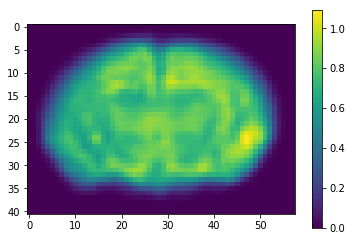

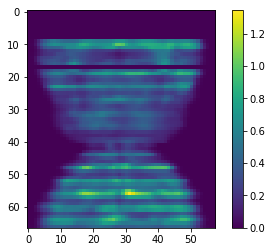

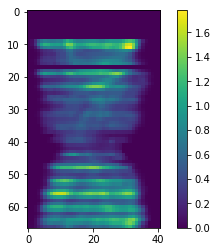

In [10]:
#visualize a specific gene in the gene_index
i = gene_index[2]
plt.figure()
plt.imshow(np.sum(np.maximum(data[i],0), 0))
plt.colorbar()
plt.figure()
plt.imshow(np.sum(np.maximum(data[i],0), 1))
plt.colorbar()
plt.figure()
plt.imshow(np.sum(np.maximum(data[i],0), 2))
plt.colorbar()
plt.show()

- Observation: It seems there is an alignment issue.

In [48]:
#define_function a function that shows two genes together
def visualize_two_genes(geneA, geneB, colorA = 'red', colorB = 'green', missing_mask = True):    
    geneA = np.maximum(geneA, 0)
    geneB = np.maximum(geneB, 0)
    color_map = {'red':0, 'green':1, 'blue':2}
    colorA = color_map[colorA]
    colorB = color_map[colorB]
    
    if missing_mask:
        geneA = geneA > 0
        geneB = geneB > 0
    
    plt.figure()
    
    x_dim, y_dim, z_dim = geneA.shape
    out1 = np.zeros((y_dim, z_dim, 3))
    out1[:,:,colorA] = np.sum(geneA, 0)
    out1[:,:,colorA] /= np.max(out1[:,:,colorA])
    out1[:,:,colorB] = np.sum(geneB, 0)
    out1[:,:,colorB] /= np.max(out1[:,:,colorB])
    out1 
    plt.imshow(out1)
    #plt.colorbar()
    
    plt.figure()
    out2 = np.zeros((x_dim, z_dim, 3))
    out2[:,:,colorA] = np.sum(geneA, 1)
    out2[:,:,colorA] /= np.max(out2[:,:,colorA])
    out2[:,:,colorB] = np.sum(geneB, 1)
    out2[:,:,colorB] /= np.max(out2[:,:,colorB])
    
    plt.imshow(out2)
    #plt.colorbar()
    
    plt.figure()
    
    out3 = np.zeros((x_dim, y_dim, 3))
    out3[:,:,colorA] = np.sum(geneA, 2)
    out3[:,:,colorA] /= np.max(out3[:,:,colorA])
    out3[:,:,colorB] = np.sum(geneB, 2)
    out3[:,:,colorB] /= np.max(out3[:,:,colorB])
    
    plt.imshow(out3)
    plt.colorbar()
    plt.show()

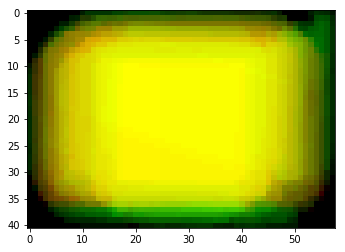

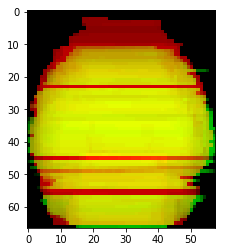

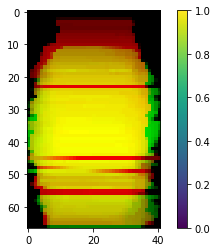

In [49]:
#visualize two genes at the same time using red/blue colors
visualize_two_genes(data[330], data[0], colorA='red', colorB = 'green')

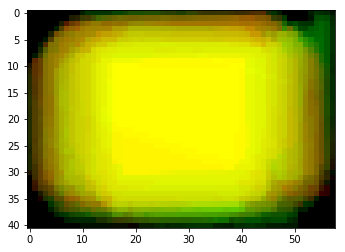

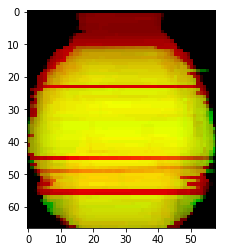

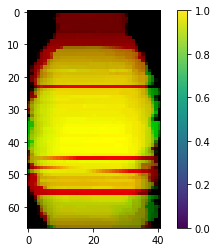

In [50]:
#visualize two genes at the same time using red/blue colors
visualize_two_genes(data[1128], data[0], colorA='red', colorB = 'green')

- Observation: Different genes are not very well aligned.